In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

## Install libraries

```bash
conda create -n edu4 python=3.10 jupyter matplotlib
```

```bash 
! pip install -U -r requirements.txt
```

```bash
! pip install -U numpy
! pip install -U scikit-learn
```

In [2]:
! ls

data
images
requirements.txt
workshop_1_linear_regression.ipynb
workshop_2_logistic_regression_lda_qda_nb.ipynb
workshop_3_resampling_methods.ipynb


In [3]:
! pip install -U -r requirements.txt

## Update repository

In [4]:
! git pull

Already up to date.


## Add import path

In [5]:
import os
import sys
import gc

In [6]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [7]:
del module_path

## Organize imports

In [8]:
import multiprocessing
from pathlib import Path

In [9]:
import seaborn as sns

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Number of CPU cores

In [24]:
workers = multiprocessing.cpu_count()
workers

8

## Initialize path

In [25]:
DATA = Path('data')
PATH = DATA / 'linear_regression'
PATH.mkdir(exist_ok=True, parents=True)

In [27]:
! ls

data                               workshop_1_linear_regression.ipynb
requirements.txt


In [30]:
! ls {PATH}

student_scores.csv


## Download data

In [33]:
studen_scores_url = 'https://www.kaggle.com/datasets/kamleshsam/student-scores/download?datasetVersionNumber=1'

In [34]:
! wget -P {PATH} {studen_scores_url}

zsh:1: no matches found: https://www.kaggle.com/datasets/kamleshsam/student-scores/download?datasetVersionNumber=1


## Prepare data

In [36]:
SEED = 2022

In [38]:
studen_scores_path = PATH / 'student_scores.csv'

In [39]:
df = pd.read_csv(studen_scores_path)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [40]:
df.shape

(25, 2)

<AxesSubplot: title={'center': 'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

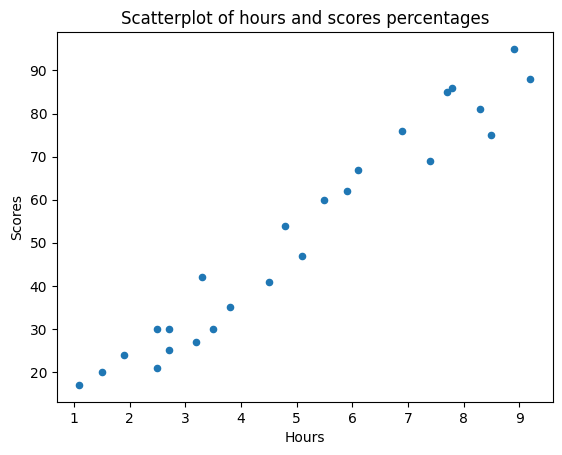

In [41]:
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

In [42]:
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [43]:
print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


#### Prepare dataset

In [44]:
y = df['Scores'].values.reshape(-1, 1)
X = df['Hours'].values.reshape(-1, 1)

In [45]:
print(df['Hours'].values)
print(df['Hours'].values.shape)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
(25,)


In [46]:
print(X.shape)
print(X)

(25, 1)
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


#### Split the dataset

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=SEED)

In [50]:
print(X_train)
print(y_train)

[[1.5]
 [4.5]
 [7.7]
 [9.2]
 [7.8]
 [2.5]
 [1.1]
 [8.3]
 [8.5]
 [8.9]
 [5.9]
 [5.1]
 [2.7]
 [2.7]
 [6.1]
 [6.9]
 [3.8]
 [1.9]
 [2.5]
 [3.3]]
[[20]
 [41]
 [85]
 [88]
 [86]
 [21]
 [17]
 [81]
 [75]
 [95]
 [62]
 [47]
 [25]
 [30]
 [67]
 [76]
 [35]
 [24]
 [30]
 [42]]


## Train the model

In [53]:
regressor = LinearRegression(n_jobs=workers)

In [54]:
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [55]:
print(regressor.intercept_)

[3.37694725]


In [56]:
print(regressor.coef_)

[[9.70724534]]


#### inference the model

In [57]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[[95.595778]]


In [58]:
score = regressor.predict([[9.5]])
print(score)

[[95.595778]]


In [59]:
y_pred = regressor.predict(X_test)

In [61]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      30  37.352306
1      69  75.210563
2      54  49.971725
3      27  34.440132
4      60  56.766797


#### Evaluate the model

In [64]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [65]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 5.65
Mean squared error: 34.93
Root mean squared error: 5.91


## Multiple Linear Regression

In [66]:
pertol_consumption_path = PATH / 'petrol_consumption.csv'

In [68]:
df = pd.read_csv(pertol_consumption_path)
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [69]:
df.shape

(48, 5)

#### Data analysis

In [70]:
print(df.describe().round(2).T)

                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   111.89   344.00   509.50   

                                  50%      75%       max  
Petrol_tax                       7.50     8.12     10.00  
Average_income                4298.00  4578.75   5342.00  
Paved_Highways                4735.50  7156.00  17782.00  
Population_Driver_licence(%)     0.56     0.60      0.72  
Petrol_Consumption             568.50   632.75    968.00  


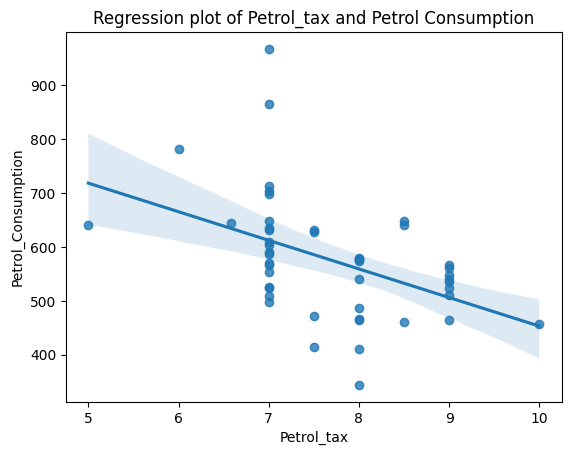

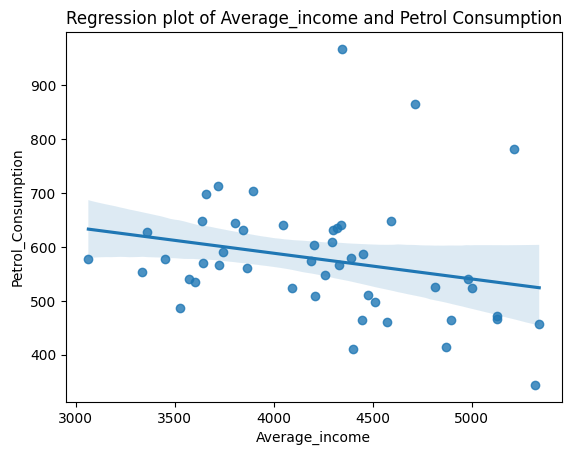

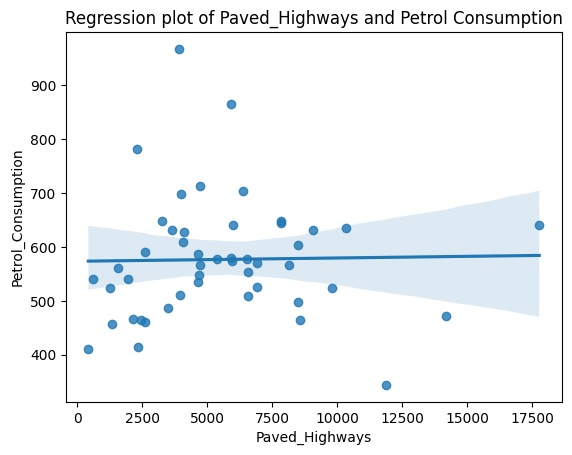

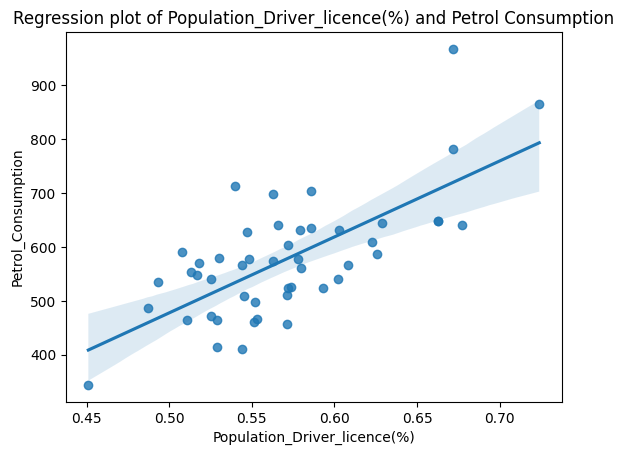

In [79]:
variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(
        x=var, y='Petrol_Consumption', data=df).set(
        title=f'Regression plot of {var} and Petrol Consumption')

[Text(0.5, 1.0, 'Heatmap of Consumption Data - Pearson Correlations')]

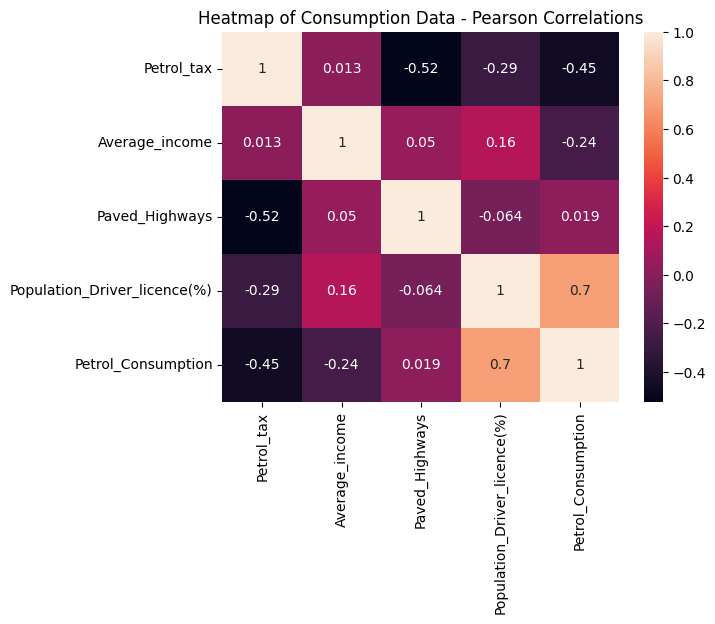

In [78]:
correlations = df.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(
    title='Heatmap of Consumption Data - Pearson Correlations')

#### Prepare dataset

In [81]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [83]:
X.shape

(48, 4)

In [85]:
regressor = LinearRegression(n_jobs=workers)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=8)

In [86]:
regressor.intercept_

499.0058612227565

In [87]:
regressor.coef_

array([-5.72964104e-02, -2.85484343e-03,  1.11587014e+03, -3.92450805e+01])

In [89]:
feature_names = X.columns
feature_names

Index(['Average_income', 'Paved_Highways', 'Population_Driver_licence(%)',
       'Petrol_tax'],
      dtype='object')

In [90]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

                              Coefficient value
Average_income                        -0.057296
Paved_Highways                        -0.002855
Population_Driver_licence(%)        1115.870140
Petrol_tax                           -39.245081


#### Inference with the model

In [92]:
y_pred = regressor.predict(X_test)
y_pred

array([428.43774447, 714.05396466, 526.08446241, 509.21780555,
       654.66965644, 349.66176109, 502.31634922, 557.4430578 ,
       569.12327533, 516.35456132])

In [93]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
22     464  428.437744
39     968  714.053965
25     566  526.084462
3      414  509.217806
40     587  654.669656
6      344  349.661761
7      467  502.316349
9      498  557.443058
43     591  569.123275
34     487  516.354561


#### Evaluate the model

In [94]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 64.40
Mean squared error: 8714.52
Root mean squared error: 93.35


In [95]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.6630382427097894


In [96]:
regressor.score(X_test, y_test)

0.6630382427097894

In [97]:
regressor.score(X_train, y_train)

0.6516872236248235